In [118]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("BRA.csv")

In [3]:
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/12,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/12,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/12,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/12,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/12,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


<BarContainer object of 3 artists>

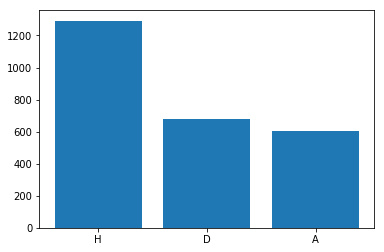

In [4]:
plt.bar(df['Res'].value_counts().keys(),df['Res'].value_counts())

In [5]:
vocab = df['Home'].unique()

In [6]:
word2idx = {word: i for i, word in enumerate(vocab)}

In [7]:
def word2vector(word):
    m = np.zeros(len(word2idx))
    m[word2idx.get(word)] = 1
    return m

In [131]:
# Transforma os dois times em um vetor com o flag do time correspondente
def prepare(H,A):
    vec = [word2vector(H), word2vector(A)]
#     return [word2vector(H), word2vector(A)]
    return np.array(vec).reshape(np.array(vec).shape[1]*2)

In [132]:
y = []

for d in df[['Res']]['Res']:
    if d == 'H':
        y.append([1,0,0])
    if d == 'D':
        y.append([0,1,0])
    if d == 'A':
        y.append([0,0,1])
    if d != 'H' and d != 'A' and d != 'D':
        y.append([0,0,0])

In [133]:
y1 = np.array(y).reshape(np.array(y).shape[0],3)

In [134]:
X = []

for _, row in df.iterrows():
    X.append(prepare(row['Home'], row['Away']))   

In [135]:
X1 = np.array(X).reshape(np.array(X).shape[0],62)

In [166]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

model = Sequential()
model.add(Dense(31, input_dim=62, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))



In [167]:
# For a multi-class classification problem
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, shuffle=True)

In [172]:
model.fit(X_train, y_train, epochs=20, batch_size=500)

Epoch 1/20
1727/1727 [==============================] - 0s 28us/step - loss: 0.6103 - acc: 0.6667
Epoch 2/20
1727/1727 [==============================] - 0s 25us/step - loss: 0.6087 - acc: 0.6694
Epoch 3/20
1727/1727 [==============================] - 0s 19us/step - loss: 0.6100 - acc: 0.6699
Epoch 4/20
1727/1727 [==============================] - 0s 19us/step - loss: 0.6080 - acc: 0.6709
Epoch 5/20
1727/1727 [==============================] - 0s 18us/step - loss: 0.6065 - acc: 0.6728
Epoch 6/20
1727/1727 [==============================] - 0s 20us/step - loss: 0.6083 - acc: 0.6680
Epoch 7/20
1727/1727 [==============================] - 0s 19us/step - loss: 0.6076 - acc: 0.6765
Epoch 8/20
1727/1727 [==============================] - 0s 20us/step - loss: 0.6053 - acc: 0.6796
Epoch 9/20
1727/1727 [==============================] - 0s 19us/step - loss: 0.6047 - acc: 0.6790
Epoch 10/20
1727/1727 [==============================] - 0s 20us/step - loss: 0.6056 - acc: 0.6742
Epoch 11/20
1727/17

In [173]:
score = model.evaluate(X_test, y_test, verbose=0)

In [174]:
score

[0.5961755382622911, 0.6827073813604078]

In [170]:
H = 'Vasco'
A = 'Palmeiras'
x = np.array([word2vector(H), word2vector(A)]).reshape(1,62)
p = model.predict(x, batch_size=None, verbose=0, steps=None)

In [171]:
p

array([[0.44353446, 0.28314617, 0.27331936]], dtype=float32)